# Lab IV: Linear Models
### Dongju Han

### Q0. Please answer the following questions in your own words.

1. What makes a model “linear”? “Linear” in what?

A model is considered linear if it examines the relationship between variables, such as x and y, often using regression techniques to derive a linear equation. This equation is used to predict y based on x. Through this process, we determine both the correlation between the variables and the strength of their linear association.

2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.) There’s further explanation at the end of this document, if needed.

One-hot encoding is a method of encoding categorical variables as a set of binary variables in which each category is encoded using values 0 and 1. Suppose the categories are Red and Blue, and you'd like to focus on observations where the color is Red; you might have a binary variable such as "Is_Red": it would be 1 if the color were Red, and 0 otherwise. If Blue were used as the base category and not encoded directly, then the intercept in a regression model would be the mean response for Blue with all the other predictors at their reference level (usually zero). The "Is_Red" coefficient would thus be the difference in response, i.e., price or salary, when color = Red relative to Blue.

3. Can linear regression be used for classification? Explain why, or why not.

No. Classification requires categorical data, while linear regression needs quantitative data. The difference in the types of data determines the incompatibility of linear regression and classification.

4. If you have a high accuracy on training but low on testing, what might be the problem? It’s also possible you’ll see a pattern in the residuals.

The reason is overfitting. The model has learned the training data too well, including noise and small patterns that do not generalize to new data. If residuals show a clear pattern, it suggests that the model is not generalizing well. The problem is that the model will perfom poorly on unseen data.

5. Review this page: Non-Linear with Linear What are two ways to incorporate nonlinear relationships between your target/response/dependent/outcome variable y and your features/control/response/independent variables x?

* choose a model that can natively deal with non-linearity,

* engineer a richer set of features by including expert knowledge which can be directly used by a simple linear model, or

* use a “kernel” to have a locally-based decision function instead of a global linear decision function.

6. Is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

The intercept is the value of the dependent variable when the indepedent variable goes to 0. The slope coefficient represents the amount of increase in the dependent variable with one unit of increase in the independent variable.

##### Q1. Load clean q1_clean: https://raw.githubusercontent.com/DS3001/linearRegression/refs/heads/main/data/Q1_clean.csv

The data include 

Price per night
Review Scores Rating: The average rating for the property
Neighborhood : The bourough of NYC. Note the space, or rename the variable.
Property Type: The kind of dwelling
Room Type: The kind of space being rented

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
#Loading Dataset
df = pd.read_csv("https://raw.githubusercontent.com/DS3001/linearRegression/refs/heads/main/data/Q1_clean.csv")
df.head()

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt


1. Compute the average prices and scores by Neighborhood ; which borough is the most expensive on average? Create a kernel density plot of price and log price, grouping by Neighborhood .

In [49]:
#Average Price by Neighborhood
df.groupby("Neighbourhood ")["Price"].mean()

Neighbourhood 
Bronx             75.276498
Brooklyn         127.747378
Manhattan        183.664286
Queens            96.857233
Staten Island    146.166667
Name: Price, dtype: float64

In [50]:
#Average Score by Neighborhood
df.groupby("Neighbourhood ")["Review Scores Rating"].mean()

Neighbourhood 
Bronx            91.654378
Brooklyn         92.363497
Manhattan        91.801496
Queens           91.549057
Staten Island    90.843750
Name: Review Scores Rating, dtype: float64

Text(0.5, 1.0, 'Kernel Density Plot for Price by Neighborhood')

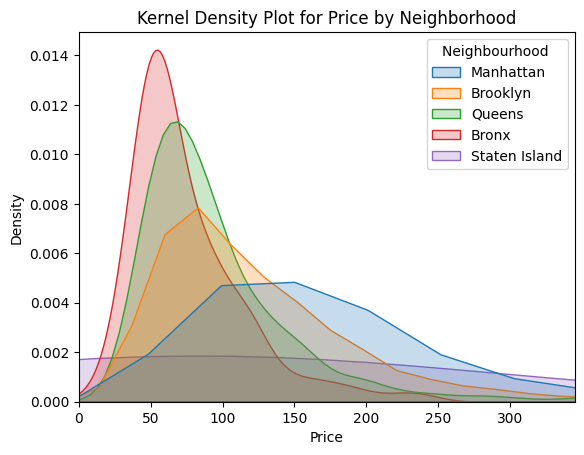

In [51]:
sns.kdeplot(df, x = "Price", hue = "Neighbourhood ", fill = True, common_norm=False)
plt.xlim(0, np.percentile(df["Price"], 95)) #I set the limit to the x-axis because if I don't the extreme
#values make the graph very hard to view
plt.title("Kernel Density Plot for Price by Neighborhood")

Text(0.5, 1.0, 'Kernel Density Plot for Log(Price) by Neighborhood')

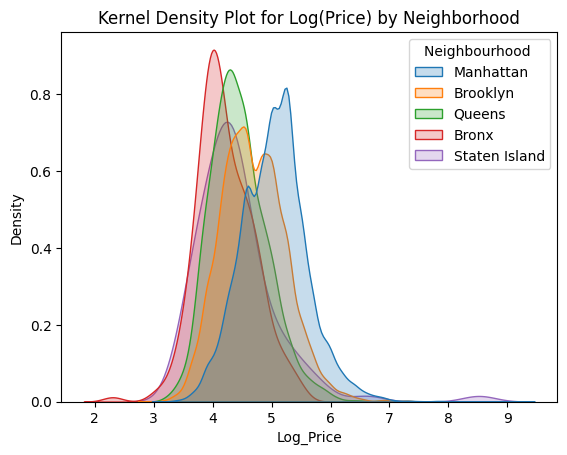

In [52]:
df["Log_Price"] = np.log(df['Price'])
sns.kdeplot(data=df, x = "Log_Price", hue = "Neighbourhood ", fill = True, common_norm = False)
plt.title("Kernel Density Plot for Log(Price) by Neighborhood")

2. Regress price on Neighborhood by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?

In [53]:
from sklearn.linear_model import LinearRegression

x = pd.get_dummies(df["Neighbourhood "], drop_first = False)
y = df["Price"]

model = LinearRegression(fit_intercept = False) #Fit_intercept False since the question asks without an intercept
model.fit(x,y)

coefficients = model.coef_
print(coefficients)

[ 75.2764977  127.74737834 183.66428632  96.8572327  146.16666667]


The coefficients are identical to the average price by neighborhood groups since there is no intercept. 

3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?

In [54]:
X = pd.get_dummies(df["Neighbourhood "], drop_first = True)
y = df["Price"]

model1 = LinearRegression(fit_intercept = True)
model1.fit(X,y)

intercept = model1.intercept_
coefficient1 = model1.coef_

print(intercept, coefficient1)

75.27649769585331 [ 52.47088065 108.38778863  21.58073501  70.89016897]


For the code above, we have to drop the first column to avoid perfect collinearity. If the first column is not dropped, the model cannot tell which column is causing the change, so we have to drop one column. In this example, the intercept is the mean of the first neighborhood column, which is Bronx. The four coefficients then represents the difference between each neighbourhood's mean and Bronx's mean. 

4. Split the sample 80/20 into a training and a test set. Run a regression of Price on Review Scores Rating and Neighborhood . What is the R2 and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from pandas import read_csv, Series, DataFrame 

#The target variable is price and the feature variable is Review Scores Rating and Neighborhood
X = pd.get_dummies(df[["Review Scores Rating", "Neighbourhood "]], drop_first = True)
y = df["Price"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

model = LinearRegression(fit_intercept = True)
model.fit(x_train, y_train)

#Based on linear_reg_overview in tuesday
y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)
print("R^2:", round(r2, 3))

rmse = mean_squared_error(y_test, y_pred) ** 0.5
print("RMSE: ", round(rmse, 3))

coefficients2 = Series(model.coef_, index = model.feature_names_in_)
print(coefficients2)

R^2: 0.019
RMSE:  224.873
Review Scores Rating              1.211465
Neighbourhood _Brooklyn          51.378062
Neighbourhood _Manhattan        107.065857
Neighbourhood _Queens            21.740329
Neighbourhood _Staten Island     17.004123
dtype: float64


The R^2 value (Coefficient of Determination) is 0.019 and RMSE (Root Mean Squared Error) value is 224.873. These two values are pretty bad as the R2 value means that only 1.9% of the variation in Price could be explained by the two feature variables, and the RMSE value means that the the model's predictions are off by around 225$. We want the R^2 value to be higher and the RMSE value to be lower. 
THe coefficient for Review Scores Rating is 1.211. 
Based on the regression coefficients, Manhattan is the most expensive neighborhood on average compared to other neighborhoods.

5. Run a regression of Price on Review Scores Rating and Neighborhood and Property Type. What is the R2 and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?

In [56]:
#The target variable is price and the feature variable is Review Scores Rating and Neighborhood and Property Type
X = pd.get_dummies(df[["Review Scores Rating", "Neighbourhood ", "Property Type"]], drop_first = True)
y = df["Price"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

model = LinearRegression(fit_intercept = True)
model.fit(x_train, y_train)

#Based on linear_reg_overview in tuesday
y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)
print("R^2:", round(r2, 3))

rmse = mean_squared_error(y_test, y_pred) ** 0.5
print("RMSE: ", round(rmse, 3))

coefficients3 = Series(model.coef_, index = model.feature_names_in_)
print(coefficients3)

R^2: 0.023
RMSE:  224.397
Review Scores Rating             1.193869e+00
Neighbourhood _Brooklyn          5.852491e+01
Neighbourhood _Manhattan         1.191788e+02
Neighbourhood _Queens            2.762255e+01
Neighbourhood _Staten Island     1.096340e+01
Property Type_Bed & Breakfast   -2.745328e+01
Property Type_Boat               5.540583e+01
Property Type_Bungalow           5.506810e+01
Property Type_Cabin              3.639367e+01
Property Type_Camper/RV         -1.271993e+01
Property Type_Castle            -4.050170e+01
Property Type_Chalet            -1.421085e-14
Property Type_Condominium        5.870433e+01
Property Type_Dorm              -4.611631e+01
Property Type_House              2.976329e+01
Property Type_Hut               -1.333385e+02
Property Type_Lighthouse        -9.084779e+01
Property Type_Loft               6.983979e+01
Property Type_Other              4.505326e+01
Property Type_Townhouse          7.119245e+01
Property Type_Treehouse          1.131142e+01
Property

The R^2 is 0.023 and RMSE is 224.397. The coefficient for Review Scores Rating is 1.194.Based on the coefficients, Townhouse is the most expensive property type.



6. What does the coefficient on Review Scores Rating mean if it changes from part 4 to 5? Hint: Think about how multiple linear regression works.

 The coefficient shows how 1 point increase in Review Scores Rating increases the price by. The coefficient slightly decreased when we added an additional feature. This suggests that some price variation originally related to Review Scores Rating was actually due to property type (new feature added in part 5) differences. 
 


### Q2. This question is a case study for linear models. The data are about car prices. In particular, they include:

Price, Color, Seating_Capacity
Body_Type: crossover, hatchback, muv, sedan, suv
Make, Make_Year: The brand of car and year produced
Mileage_Run: The number of miles on the odometer
Fuel_Type: Diesel or gasoline/petrol
Transmission, Transmission_Type: speeds and automatic/manual

1. Load cars_hw.csv. These data were really dirty, and I’ve already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly skewed variables that require a log or arcsinh transformation) Note this is different than normalizing: there is a text below that explains further. Clean the data however you think is most appropriate.

In [57]:
df2 = pd.read_csv("../data/cars_hw.csv")
df2.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [58]:
print(df2.describe()) #To see any outliers
print(df2.isnull().sum()) #No NA values

#1.5x IQR Rule is a great way to remove extreme outliers
numeric_cols = df2.select_dtypes(include = ["number"]).columns

def remove_outliers(df2, cols):
    for col in cols:
        Q1 = df2[col].quantile(0.25)
        Q3 = df2[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        df2 = df2[(df2[col]>= lower) & (df2[col]<= upper)]
    return df2
df2 = remove_outliers(df2, numeric_cols)

       Unnamed: 0    Make_Year   Mileage_Run  Seating_Capacity         Price
count  976.000000   976.000000    976.000000        976.000000  9.760000e+02
mean   488.500000  2016.963115  41571.195697          5.095287  7.410195e+05
std    281.891232     2.818742  24390.995134          0.446224  3.673234e+05
min      1.000000  2011.000000   1117.000000          4.000000  1.880000e+05
25%    244.750000  2015.000000  22676.750000          5.000000  4.757500e+05
50%    488.500000  2017.000000  37570.500000          5.000000  6.665000e+05
75%    732.250000  2019.000000  57421.250000          5.000000  8.830000e+05
max    976.000000  2022.000000  99495.000000          8.000000  2.941000e+06
Unnamed: 0           0
Make                 0
Make_Year            0
Color                0
Body_Type            0
Mileage_Run          0
No_of_Owners         0
Seating_Capacity     0
Fuel_Type            0
Transmission         0
Transmission_Type    0
Price                0
dtype: int64


In [59]:
print(df2.select_dtypes(include=["number"]).skew())

#After removing the extreme values, the numeric values are not too skewed.

Unnamed: 0          0.019514
Make_Year          -0.349687
Mileage_Run         0.499182
Seating_Capacity    0.000000
Price               0.621059
dtype: float64


2. Summarize the Price variable and create a kernel density plot. Use .groupby() and .describe() to summarize prices by brand (Make). Make a grouped kernel density plot by Make. Which car brands are the most expensive? What do prices look like in general?

count    8.780000e+02
mean     6.693200e+05
std      2.531389e+05
min      2.370000e+05
25%      4.582500e+05
50%      6.390000e+05
75%      8.262500e+05
max      1.464000e+06
Name: Price, dtype: float64


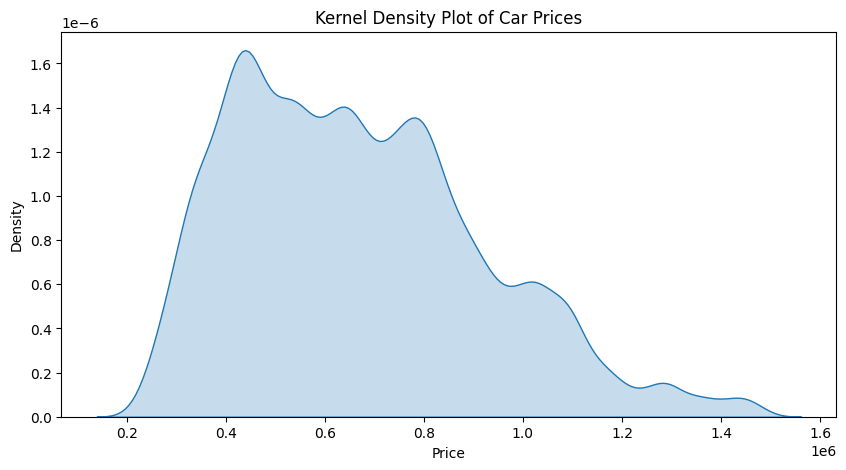

In [60]:
#Summarize Price Variable

print(df2["Price"].describe())

plt.figure(figsize = (10, 5))
sns.kdeplot(df2["Price"], fill = True, bw_adjust = 0.5)
plt.title("Kernel Density Plot of Car Prices")
plt.xlabel("Price")
plt.ylabel("Density")
plt.show()

In [61]:
#Summarize Price by Brand (Make)
price_make = df2.groupby('Make')['Price'].describe()
print(price_make)

               count          mean            std        min        25%  \
Make                                                                      
Chevrolet        6.0  4.535000e+05  246606.366503   267000.0   288500.0   
Datsun           3.0  2.896667e+05   10503.967504   279000.0   284500.0   
Ford            52.0  7.211731e+05  140927.699605   290000.0   635000.0   
Honda           69.0  7.964928e+05  256112.660366   316000.0   580000.0   
Hyundai        304.0  6.884375e+05  273012.825123   248000.0   484750.0   
Jeep             1.0  1.290000e+06            NaN  1290000.0  1290000.0   
Kia              1.0  1.369000e+06            NaN  1369000.0  1369000.0   
Mahindra         2.0  1.177000e+06  141421.356237  1077000.0  1127000.0   
Maruti Suzuki  282.0  5.840355e+05  212976.780561   237000.0   411250.0   
Nissan           4.0  8.842500e+05  289559.867155   475000.0   782500.0   
Renault         55.0  6.530364e+05  236652.813651   287000.0   454500.0   
Skoda            4.0  6.8

/tmp/ipykernel_25967/1424854318.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df2, x = "Price", hue = "Make", fill = True, palette = "tab10")


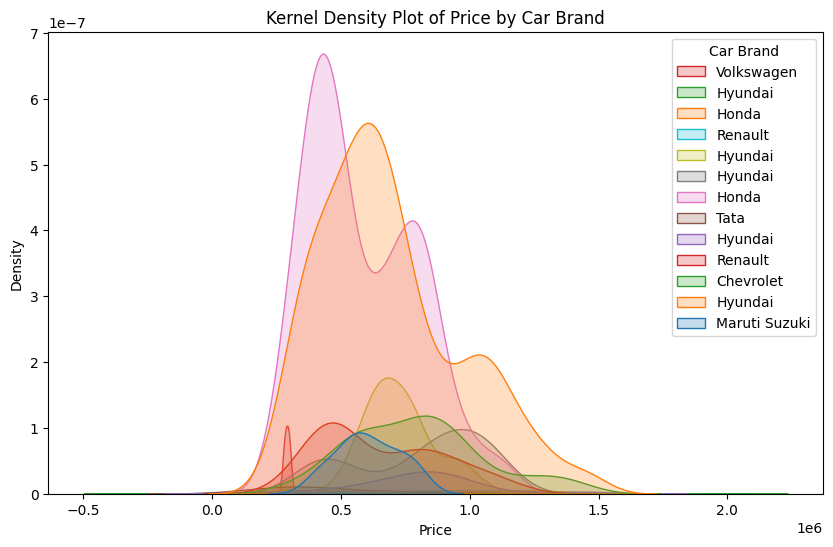

In [62]:
plt.figure(figsize = (10,6))
sns.kdeplot(df2, x = "Price", hue = "Make", fill = True, palette = "tab10")
plt.title("Kernel Density Plot of Price by Car Brand")
plt.xlabel("Price")
plt.ylabel("Density")
plt.legend(df2["Make"], title = "Car Brand")
plt.show()

In [63]:
#Most expensive Car Brand 
avg_price = df2.groupby("Make")["Price"].mean().sort_values(ascending=False)
print(avg_price)

Make
Kia              1.369000e+06
Jeep             1.290000e+06
Mahindra         1.177000e+06
Nissan           8.842500e+05
Tata             8.024375e+05
Toyota           8.003400e+05
Honda            7.964928e+05
Ford             7.211731e+05
Hyundai          6.884375e+05
Skoda            6.847500e+05
Renault          6.530364e+05
Volkswagen       6.058276e+05
Maruti Suzuki    5.840355e+05
Chevrolet        4.535000e+05
Datsun           2.896667e+05
Name: Price, dtype: float64


If you look at the mean price, Kia is the most expensive car brand. 

3. Split the data into an 80% training set and a 20% testing set.

In [64]:
X = df2.drop(columns = ["Price"])
y = df2["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

4. Make a model where you regress price on the numeric variables alone; what is the R2 and RMSE on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use pd.get_dummies(); be careful of the dummy variable trap); what is the R2 and RMSE on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the R2 and RMSE on the test set? Does the joint model perform better or worse, and by home much?

In [65]:
#First Model - Numeric Columns

X_train1 = X_train.select_dtypes(include = ["number"])
X_test1 = X_test.select_dtypes(include = ["number"])

model = LinearRegression(fit_intercept = True)
model.fit(X_train1, y_train)

y_pred = model.predict(X_test1)

r2 = r2_score(y_test, y_pred)
print("R^2: ", round(r2, 3))

RMSE = mean_squared_error(y_test, y_pred) ** 0.5
print("RMSE: ", round(RMSE, 3))

R^2:  0.291
RMSE:  217116.056


In [66]:
#2nd Model - Categorical 

X_train2 = X_train.select_dtypes(include = ["object"])
X_test2 = X_test.select_dtypes(include = ["object"])
#Store the column names of all categorical features from X_train2 and X_test2
X_train_col = X_train.select_dtypes(include = ["object"]).columns 
X_test_col = X_test.select_dtypes(include = ["object"]).columns

X_train2 = pd.get_dummies(X_train2, drop_first = True)
X_test2 = pd.get_dummies(X_test2, drop_first = True)

X_test2 = X_test2.reindex(columns = X_train2.columns, fill_value = 0)

model = LinearRegression(fit_intercept = True)
model.fit(X_train2, y_train)

y_pred = model.predict(X_test2)

r2 = r2_score(y_test, y_pred)
print("R^2: ", round(r2, 3))

RMSE = mean_squared_error(y_test, y_pred) ** 0.5
print("RMSE: ", round(RMSE, 3))

R^2:  0.495
RMSE:  183345.757


In [67]:
#3rd Model - Joint

X_train3 = pd.concat([X_train1, X_train2], axis = 1) #axis = 1 means concatenate horizontally
X_test3 = pd.concat([X_test1, X_test2], axis = 1)

X_test3 = X_test3.reindex(columns=X_train3.columns, fill_value = 0)

model = LinearRegression(fit_intercept = True)
model.fit(X_train3, y_train)

y_pred = model.predict(X_test3)

r2 = r2_score(y_test, y_pred)
print("R^2: ", round(r2, 3))

RMSE = mean_squared_error(y_test, y_pred) ** 0.5
print("RMSE: ", round(RMSE, 3))

R^2:  0.736
RMSE:  132491.435


Based on the R2 value and RMSE values, the 2nd Model (Categorical) performed better than the 1st Model (Numerical). Furthermore, the 3rd Model (Joint) performed the best as it had significantly higher R2 value and significantly less RMSE value. This is ideal since the joint model provides the model extra information about the relationship between the features and the price. 

5.Use the PolynomialFeatures function from sklearn to expand the set of numerical variables you’re using in the regression. As you increase the degree of the expansion, how do the R2 and RMSE change? At what point does R2 go negative on the test set? For your best model with expanded features, what is the R2 and RMSE? How does it compare to your best model from part 4?

In [68]:
from sklearn.preprocessing import PolynomialFeatures

test = []

for degree in range (1, 6):
    Polynomial = PolynomialFeatures(degree=degree, include_bias = False)
    X_train4 = X_train.select_dtypes(include = ["number"])
    X_test4 = X_test.select_dtypes(include = ["number"])
    X_train4 = Polynomial.fit_transform(X_train4)
    X_test4 = Polynomial.transform(X_test4)

    model = LinearRegression()
    model.fit(X_train4, y_train)

    y_train_pred = model.predict(X_train4)
    y_test_pred = model.predict(X_test4)

    r2_train = r2_score(y_train, y_train_pred)
    RMSE_train = mean_squared_error(y_train, y_train_pred) ** 0.5

    r2_test = r2_score(y_test, y_test_pred)
    RMSE_test = mean_squared_error(y_test, y_test_pred) ** 0.5

    test.append((degree, r2_train, RMSE_train, r2_test, RMSE_test))

for result in test:
    print(f"Degree: {result[0]}, R2 Train: {result[1]:.3f}, RMSE Train: {result[2]:.3f}, R2 Test: {result[3]:.3f}, RMSE Test: {result[4]:.3f}")

Degree: 1, R2 Train: 0.370, RMSE Train: 198961.740, R2 Test: 0.291, RMSE Test: 217116.056
Degree: 2, R2 Train: 0.386, RMSE Train: 196427.426, R2 Test: 0.296, RMSE Test: 216403.323
Degree: 3, R2 Train: 0.390, RMSE Train: 195796.131, R2 Test: 0.300, RMSE Test: 215810.895
Degree: 4, R2 Train: 0.395, RMSE Train: 194903.836, R2 Test: 0.311, RMSE Test: 214088.818
Degree: 5, R2 Train: 0.404, RMSE Train: 193504.109, R2 Test: 0.314, RMSE Test: 213516.826


According to the values above, as I increase the degree of the expansion, the R2 constantly increases and RMSE constantly decreases by a small margin. There isn't a point where R2 goes negative, but as degree increases, the amount of increase in R2 value tends to decrease. Since degree 5 gives minor improvements compared to degree 4, I would say that the ideal degree is 4. For degree 4, the R2 Train is 0.395, RMSE Train is 194903, R2 Test is 0.311, and RMSE Test is 214088. In comparison to the joint model in Problem 4, this polynomial model performs worse. (Higher RMSE and lower R2)

6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

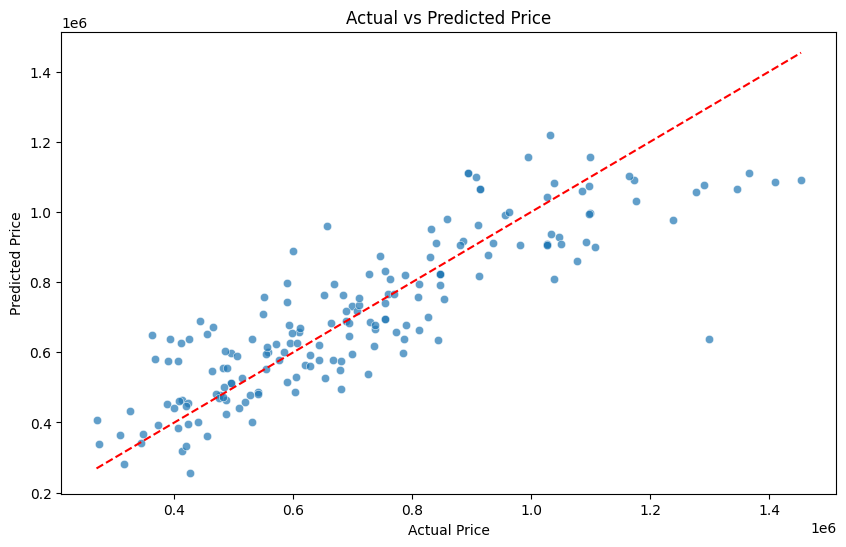

In [69]:
#Scatterplot
#The joint model performed the best

X_train3 = pd.concat([X_train1, X_train2], axis = 1) #axis = 1 means concatenate horizontally
X_test3 = pd.concat([X_test1, X_test2], axis = 1)

X_test3 = X_test3.reindex(columns=X_train3.columns, fill_value = 0)

model = LinearRegression(fit_intercept = True)
model.fit(X_train3, y_train)

y_pred = model.predict(X_test3)


plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = y_pred, alpha = 0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color = "red")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()

658   -106631.314225
413   -153401.067206
695    115827.845102
314    126747.562522
0     -302441.570968
           ...      
604    -96461.395224
947    -53231.439400
303     87299.293794
727     75684.252017
62    -197580.047480
Name: Price, Length: 176, dtype: float64


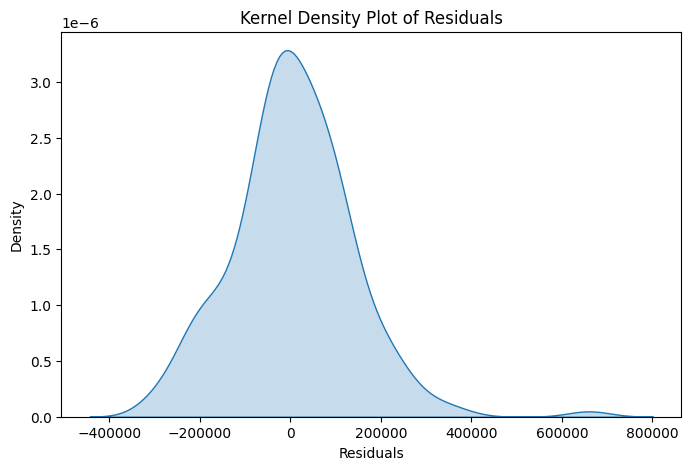

In [70]:
#Residual & Kernel Density Plot

residual = y_test - y_pred
print(residual)

plt.figure(figsize = (8, 5))
sns.kdeplot(residual, fill = True)
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Kernel Density Plot of Residuals")
plt.show()

The scatterplot roughly lines up along the diagonal meaning that the predicted values and true values are quite similar. For the kernel density plot, the residuals seems to be bell-shaped around zero with some outliers. The two graphs show that our model is quite strong, and the weakness would be that the outliers is what make our model imperfect.

### Q3

1. Find a dataset on a topic you’re interested in. Some easy options are data.gov, kaggle.com, and data.world.

In [71]:
df3 = pd.read_csv("../data/Screentime-App-Details-Dataset.csv")

2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.


In [72]:
#Cleaning Data
df3 = df3.dropna()
df3.head()

,Date,Usage,Notifications,Times opened,App
0,08/26/2022,38,70,49,Instagram
1,08/27/2022,39,43,48,Instagram
2,08/28/2022,64,231,55,Instagram
3,08/29/2022,14,35,23,Instagram
4,08/30/2022,3,19,5,Instagram


In [73]:
df3.describe()

,Usage,Notifications,Times opened
count,54.000000,54.000000,54.000000
mean,65.037037,117.703704,61.481481
std,58.317272,97.017530,43.836635
min,1.000000,8.000000,2.000000
25%,17.500000,25.750000,23.500000
50%,58.500000,99.000000,62.500000
75%,90.500000,188.250000,90.000000
max,244.000000,405.000000,192.000000


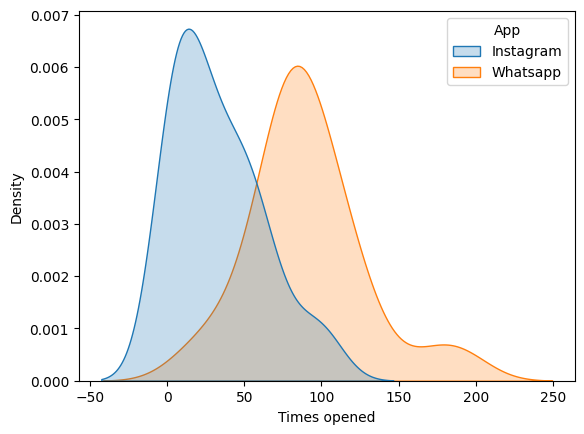

In [74]:
df3.groupby("App")["Times opened"].mean()

sns.kdeplot(df3, x = "Times opened", hue = "App", fill = True)
plt.show()

3. Split the sample into an ~80% training set and a ~20% test set.

In [75]:
X = df3.drop(columns = ["Times opened"])
y = df3["Times opened"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the RMSE on the test set.

In [76]:
#1st Model - Numeric
X_train1 = X_train.select_dtypes(include = ["number"])
X_test1 = X_test.select_dtypes(include = ["number"])

model = LinearRegression(fit_intercept = True)
model.fit(X_train1, y_train)

y_pred = model.predict(X_test1)

r2 = r2_score(y_test, y_pred)
print("R^2: ", round(r2, 3))

RMSE = mean_squared_error(y_test, y_pred) ** 0.5
print("RMSE: ", round(RMSE, 3))

R^2:  0.853
RMSE:  21.13


In [77]:
#2nd Model - Categorical 
X_train2 = X_train.select_dtypes(include = ["object"])
X_test2 = X_test.select_dtypes(include = ["object"])
X_train_col = X_train.select_dtypes(include = ['object']).columns
X_test_col = X_test.select_dtypes(include = ['object']).columns

X_train2 = pd.get_dummies(X_train2[X_train_col], drop_first = True)
X_test2 = pd.get_dummies(X_test2[X_test_col], drop_first = True)

X_test2 = X_test2.reindex(columns = X_train2.columns, fill_value = 0)

model = LinearRegression(fit_intercept = True)
model.fit(X_train2, y_train)

y_pred = model.predict(X_test2)

r2 = r2_score(y_test, y_pred)
print("R^2: ", round(r2, 3))

RMSE = mean_squared_error(y_test, y_pred) ** 0.5
print("RMSE: ", round(RMSE, 3))

R^2:  0.417
RMSE:  42.016


In [78]:
#3rd Model - Joint 

X_train3 = pd.concat([X_train1, X_train2], axis = 1) #axis = 1 means concatenate horizontally
X_test3 = pd.concat([X_test1, X_test2], axis = 1)

X_test3 = X_test3.reindex(columns=X_train3.columns, fill_value = 0)

model = LinearRegression(fit_intercept = True)
model.fit(X_train3, y_train)

y_pred = model.predict(X_test3)

r2 = r2_score(y_test, y_pred)
print("R^2: ", round(r2, 3))

RMSE = mean_squared_error(y_test, y_pred) ** 0.5
print("RMSE: ", round(RMSE, 3))

R^2:  0.805
RMSE:  24.306


5. Which model performed the best, and why?

With my personal dataset, I got an unexpected values as the regression model with numeric variable alone had a higher R2 and lower RMSE value than the joint (Numeric & Categorical) model. (Although there are nearly no differences) This suggests that the categorical model nearly contributed to the joint model, and the categorical model indeed have significantly less R2 value and higher RMSE value. This could also be caused due to overfitting as adding more features does not always improve performance. 

6. What did you learn?

From this lab, I've learned several valuable lessons. First, I have understood the role of the intercept in a regression model. A model without an intercept would be ineffective, as the coefficients would simply represent the mean of the target variable rather than capturing meaningful relationships. I have also learned how the R² and RMSE values indicate model performance, where a higher R² and lower RMSE signify a better model. In Part 2 of this lab, I discovered that creating a joint model (numeric and categorical features) can be highly effective, as it provides additional information that improves predictive accuracy. However, I have also learned that a joint model does not always outperform a numeric or categorical model, as it may lead to overfitting in certain cases.